# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [16]:
%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv("sinasc_RO_2019.csv")
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [41]:
intervalos = [0, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada',  'asfixia leve', 'normal']
sinasc['APGAR5_CATEGORIA'] = pd.cut(sinasc['APGAR5'], bins=intervalos, labels=categorias, include_lowest=True)

sinasc[['APGAR5_CATEGORIA', 'APGAR5']]

,APGAR5_CATEGORIA,APGAR5
0,normal,10.0
1,normal,9.0
2,normal,10.0
3,normal,10.0
4,normal,10.0
...,...,...
27023,normal,9.0
27024,normal,9.0
27025,normal,10.0
27026,normal,9.0


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

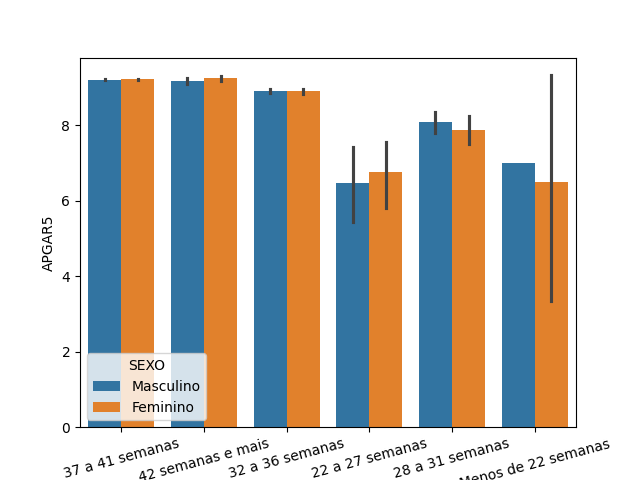

In [165]:
plt.close("all")
sns.barplot(
    data=sinasc,
    x='GESTACAO',
    y='APGAR5',
    hue='SEXO'
)
plt.tick_params(axis='x', rotation=15)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [140]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_CATEGORIA'])
freq

APGAR5_CATEGORIA,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [175]:
freq_pct = freq.div(freq.sum(axis=1), axis=0) * 100
freq_pct

APGAR5_CATEGORIA,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,24.705882,1.176471,14.117647,60.000000
28 a 31 semanas,1.851852,7.407407,11.111111,79.629630
32 a 36 semanas,0.358102,0.850492,3.267681,95.523724
37 a 41 semanas,0.146517,0.124317,0.870222,98.858944
42 semanas e mais,0.143266,0.143266,0.859599,98.853868
Menos de 22 semanas,28.571429,0.000000,14.285714,57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

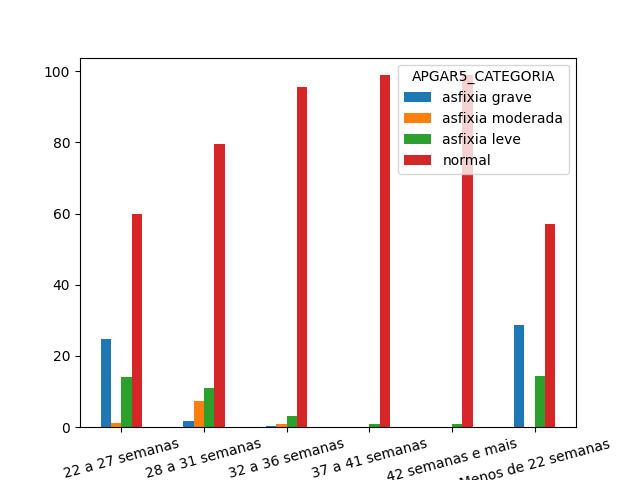

In [183]:
plt.close("all")
freq_pct.plot(kind='bar')
plt.tick_params(axis='x', rotation=15)

Conclui-se que entre 37 à mais, houve casos muito menores de asfixia. Portanto, os médicos estão certos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

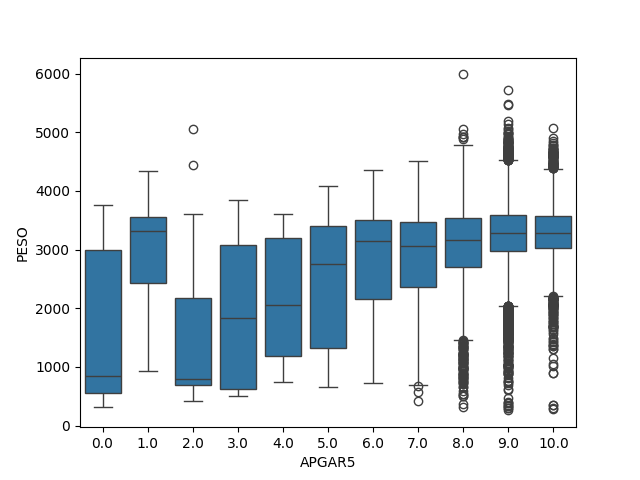

In [205]:
plt.close("all")
sns.boxplot(
    data=sinasc,
    x='APGAR5',
    y='PESO'
)

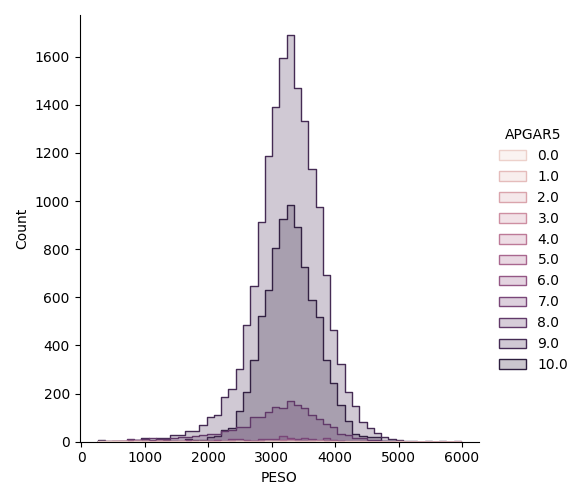

In [194]:
plt.close("all")
sns.displot(
    data=sinasc,
    x='PESO',
    hue='APGAR5',
    bins=50,
    element='step'
)

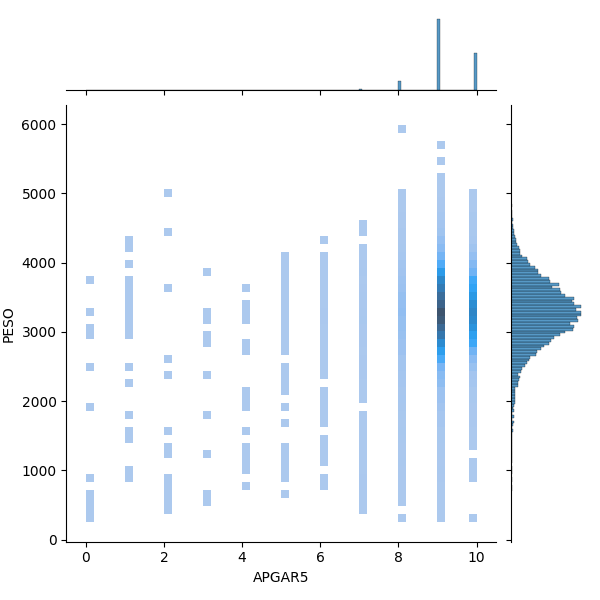

In [201]:
plt.close("all")
sns.jointplot(
    data=sinasc,
    x='APGAR5',
    y='PESO',
    kind='hist',
    bins = [50,50]
)